<a href="https://colab.research.google.com/github/ZzzTheGamer/XAI/blob/Assignment10_XAI_in_LLMs/Embedding_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embedding_Visualization
* External Resources：
- [MTEB Leaderboard](https://huggingface.co/spaces/mteb/leaderboard)
- [Sentence Transformers Documentation](https://www.sbert.net/)
- [NLTK Documentation](https://www.nltk.org/)
- [UMAP Documentation](https://umap-learn.readthedocs.io/)
- [t-SNE Overview](https://lvdmaaten.github.io/tsne/)
- Gpt4o

### Install Required Libraries

In [ ]:
# Install required third-party libraries
!pip install sentence-transformers adjustText nltk umap-learn ipywidgets plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

### Import Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import plotly.express as px
from ipywidgets import interact, IntSlider, FloatSlider
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Download NLTK Datasets

In [2]:
import nltk
# Download required datasets for NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')
from nltk.corpus import words as nltk_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Load Pretrained Embedding Model from MTEB Leaderboard

In [3]:
# Load pretrained embedding model from MTEB leaderboard
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Load and Encode Word Embeddings

In [4]:
# Use nltk.words dataset (~236k English words), selecting the first 2000 as a subset
subset_size = 2000
all_words = list(set(nltk_words.words()))
words_list = all_words[:subset_size]

# Compute embeddings for each word
embeddings = model.encode(words_list, show_progress_bar=True)

# Perform POS tagging using NLTK
pos_tags = nltk.pos_tag(words_list)
pos_labels = [tag for _, tag in pos_tags]

# Assign different colors to POS tags for visualization
unique_pos = list(set(pos_labels))
color_map = plt.cm.get_cmap('tab20', len(unique_pos))
pos_to_color = {pos: color_map(i) for i, pos in enumerate(unique_pos)}
colors = [pos_to_color[pos] for pos in pos_labels]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

<ipython-input-4-1a417b53b27c>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_pos))


### Visualize 2D Embeddings using PCA, t-SNE, and UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

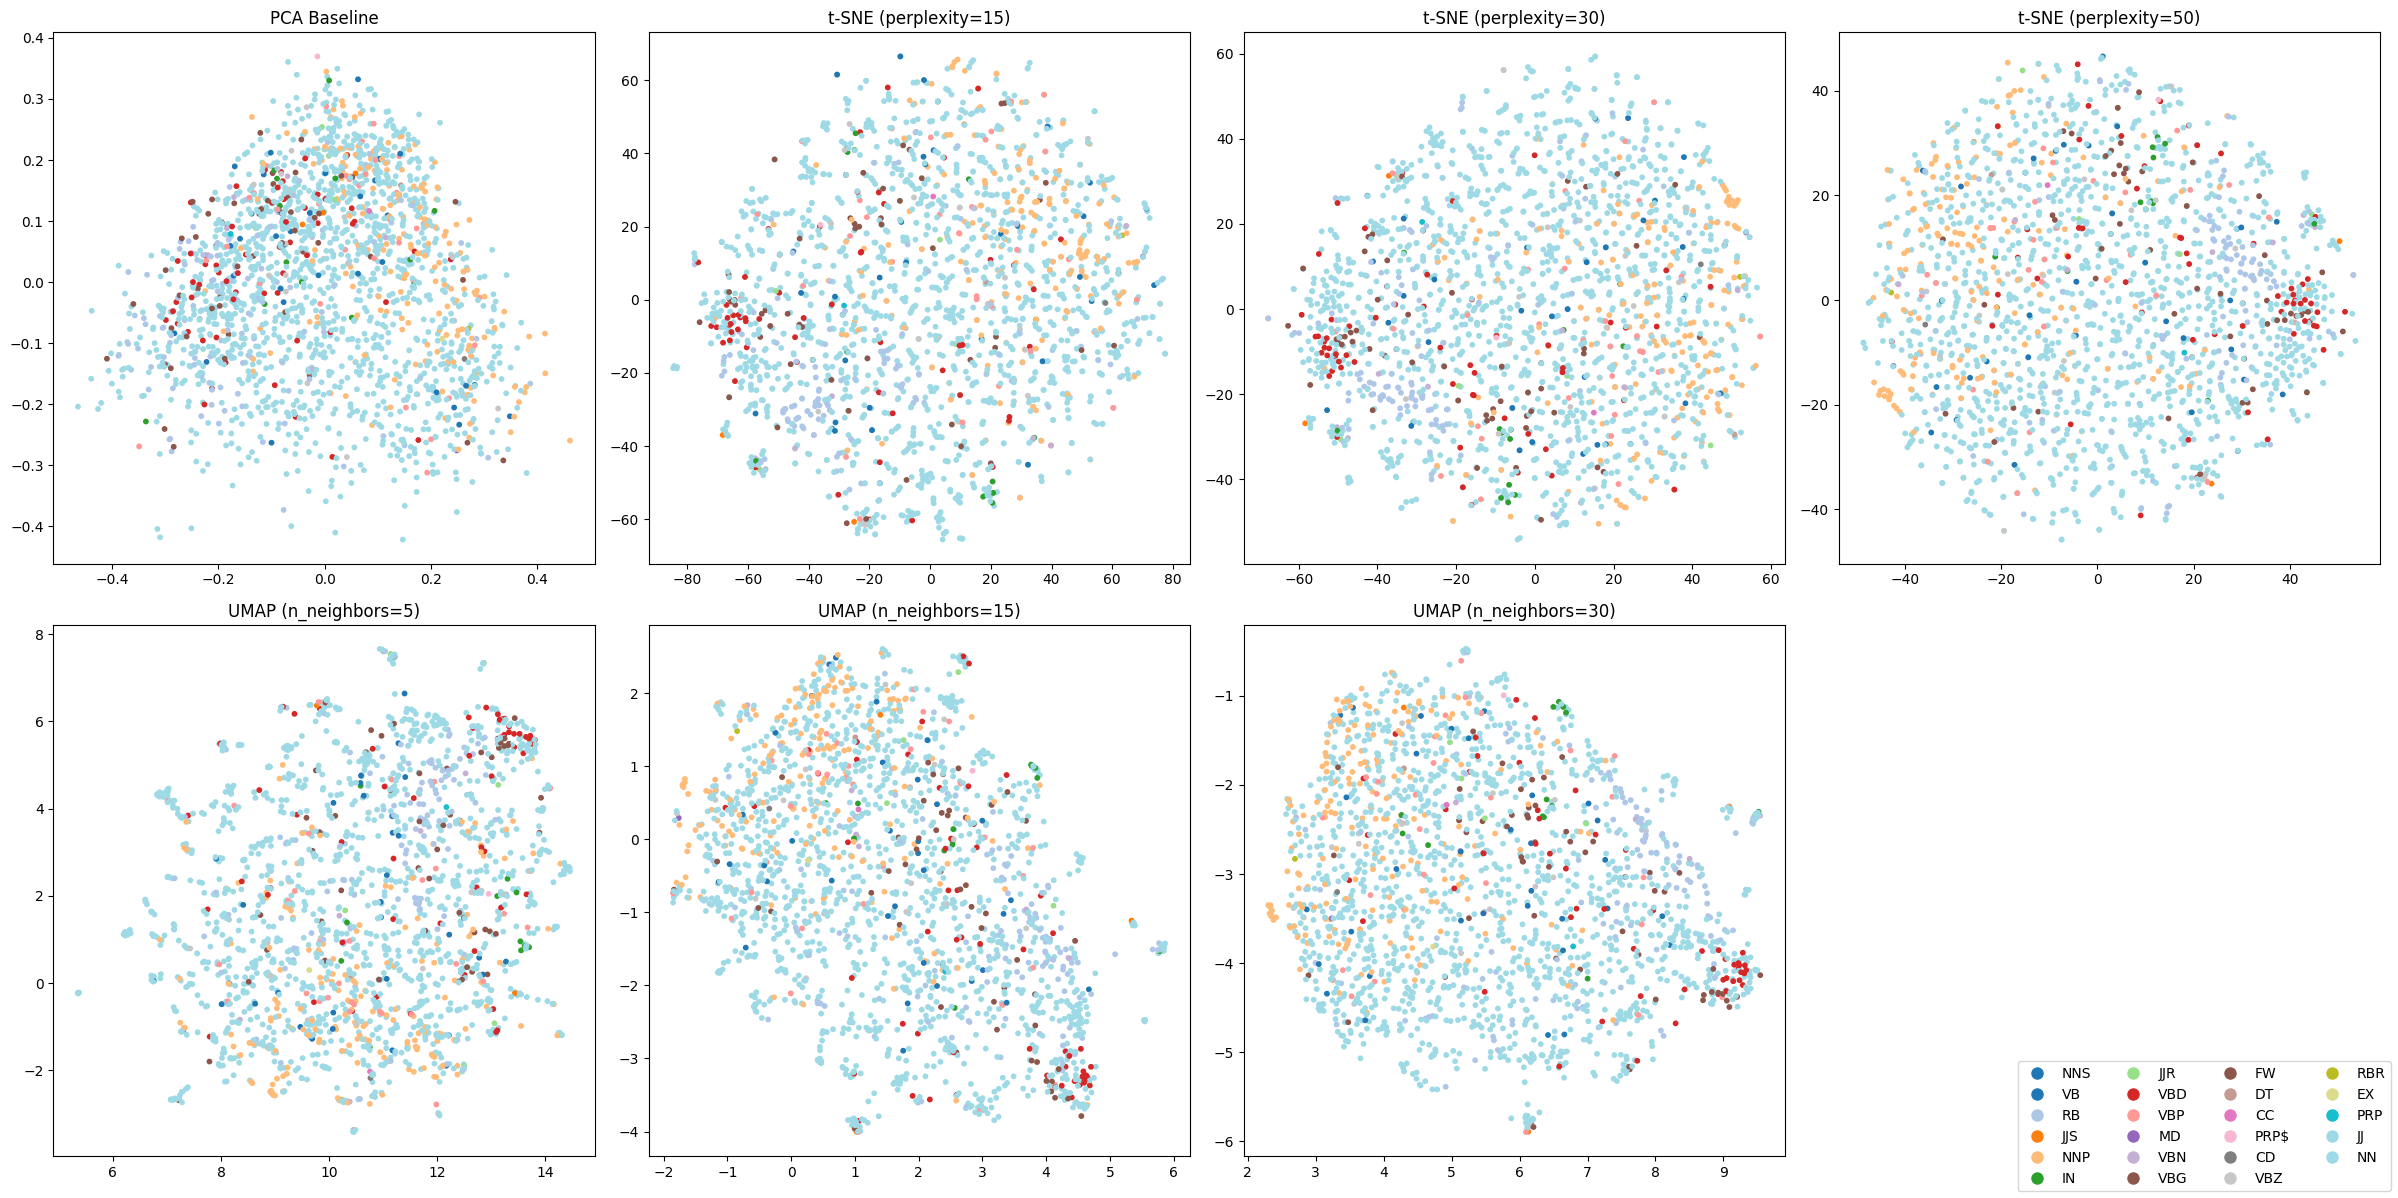

In [5]:
# Subplot layout: 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# PCA Baseline (First plot in first row)
pca = PCA(n_components=2, random_state=42)
embeddings_pca = pca.fit_transform(embeddings)
axes[0, 0].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=colors, s=10)
axes[0, 0].set_title('PCA Baseline')

# t-SNE Parameter Comparison: Different perplexity values in first-row plots
perplexities = [15, 30, 50]
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embeddings_tsne = tsne.fit_transform(embeddings)
    axes[0, i + 1].scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=colors, s=10)
    axes[0, i + 1].set_title(f't-SNE (perplexity={perplexity})')

# UMAP Parameter Comparison: Different n_neighbors values in second-row plots
n_neighbors_options = [5, 15, 30]
for i, n_neighbors in enumerate(n_neighbors_options):
    umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1, random_state=42)
    embeddings_umap = umap_model.fit_transform(embeddings)
    axes[1, i].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=colors, s=10)
    axes[1, i].set_title(f'UMAP (n_neighbors={n_neighbors})')


axes[1, 3].axis('off')
# Add POS legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=pos_to_color[pos], markersize=10)
           for pos in unique_pos]
fig.legend(handles, unique_pos, loc='lower right', ncol=4)

plt.tight_layout()
plt.show()

* From this graph, we can see there’s no clear separation of colors in PCA model. This is because language embeddings often have complex and nonlinear relationships, a simple linear projection tends to produce one main cluster.
* For the nonlineart focus model, SNE tries to preserve local distances so that points that are similar remain close together. Higher perplexity (e.g. 50) can spread points out more uniformly and capture somewhat broader relationships.However, we still see no strong grouping in this model. This is normal if the model’s embeddings don’t primarily cluster words by grammatical function.
* For the model UMAP, UMAP balances local and global structure well than t-SNE. Larger n_neighbors (30) looks more globally, sometimes merging smaller clusters into a broader shape. Again, the color distribution suggests the scatter distribution and no dominant clustering purely by POS.



### 3D Visualization using PCA

In [6]:
import plotly.express as px
from ipywidgets import interact
from sklearn.decomposition import PCA

# 3D PCA Visualization (Fixed Parameters)
def visualize_3d_pca():
    reducer = PCA(n_components=3, random_state=42)
    embeddings_3d = reducer.fit_transform(embeddings)

    fig = px.scatter_3d(
        x=embeddings_3d[:, 0],
        y=embeddings_3d[:, 1],
        z=embeddings_3d[:, 2],
        color=pos_labels,
        hover_name=words_list,
        title="3D PCA Visualization with POS Tags",
        labels={'color': 'Part of Speech'}
    )
    fig.update_traces(marker=dict(size=3))
    fig.show()

visualize_3d_pca()

* Same as the previous conclusion, the colors are mostly mixed for PCA model. This indicates that the first three principal components do not strongly separate words by grammatical function.

### 3D Visualization using t-SNE

In [7]:
from sklearn.manifold import TSNE

# 3D t-SNE Visualization (Fixed Parameters)
def visualize_3d_tsne(perplexity=30):
    reducer = TSNE(n_components=3, random_state=42, perplexity=perplexity)
    embeddings_3d = reducer.fit_transform(embeddings)

    fig = px.scatter_3d(
        x=embeddings_3d[:, 0],
        y=embeddings_3d[:, 1],
        z=embeddings_3d[:, 2],
        color=pos_labels,
        hover_name=words_list,
        title=f"3D t-SNE Visualization with POS Tags (perplexity={perplexity})",
        labels={'color': 'Part of Speech'}
    )
    fig.update_traces(marker=dict(size=3))
    fig.show()

visualize_3d_tsne()

* Same as the previous conclusion, we may see small pockets of words, but overall it still forms a single blob. T-SNE tends to sacrifice some global big picture arrangement, so while local clusters may appear, the overall distribution can look scattered.

### 3D Visualization using UMAP

In [8]:
import umap.umap_ as umap

# 3D UMAP Visualization (Fixed Parameters)
def visualize_3d_umap():
    reducer = umap.UMAP(n_components=3, random_state=42)
    embeddings_3d = reducer.fit_transform(embeddings)

    fig = px.scatter_3d(
        x=embeddings_3d[:, 0],
        y=embeddings_3d[:, 1],
        z=embeddings_3d[:, 2],
        color=pos_labels,
        hover_name=words_list,
        title="3D UMAP Visualization with POS Tags",
        labels={'color': 'Part of Speech'}
    )
    fig.update_traces(marker=dict(size=3))
    fig.show()

visualize_3d_umap()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



* Same as the previous conclusion, as with t-SNE, POS tags don’t drive strong clustering in the embedding space. This is because (1) embeddings capture semantics not grammatical function (2) Some single words lack context like run



### Therefore, here, We've Done Semantic Similarity Analysis using Cosine Similarity & UMAP

In [15]:
from numpy.linalg import norm

def most_similar_words(target_word, n=5):
    """
    For a given word target_word, compute the n similar words with the highest cosine similarity
    """
    if target_word not in words_list:
        print(f"Word '{target_word}' is not in the data set.")
        return []
    idx = words_list.index(target_word)
    target_embedding = embeddings[idx]
    # Compute cosine similarity between all words and the target word
    similarities = np.dot(embeddings, target_embedding) / (norm(embeddings, axis=1) * norm(target_embedding) + 1e-10)
    # Retrieve the top n+1 most similar words (including itself)
    top_indices = np.argsort(similarities)[-n-1:][::-1]
    similar = [words_list[i] for i in top_indices if words_list[i] != target_word][:n]
    return similar

def plot_similar_words(word, n=5):
    """
    Draw the semantic relationship diagram of target words and their similar words
    """
    similar_words = most_similar_words(word, n)
    if not similar_words:
        return
    all_words_sim = [word] + similar_words
    # Calculate the embedding of these words
    target_embeddings = model.encode(all_words_sim)
    # Use UMAP to reduce high-dimensional vectors to two dimensions
    reducer = umap.UMAP(n_components=2, random_state=42)
    embeddings_2d = reducer.fit_transform(target_embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='lightgrey')
    texts = []
    for i, (x, y) in enumerate(embeddings_2d):
        plt.plot([embeddings_2d[0, 0], x], [embeddings_2d[0, 1], y], 'grey', alpha=0.3)
        texts.append(plt.text(x, y, all_words_sim[i], fontsize=12)) #using chatgpt4o to refine this function at 1:40pm 3/22/2025
    adjust_text(texts)
    plt.title(f"Semantic Relationships: '{word}' and Similar Words")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



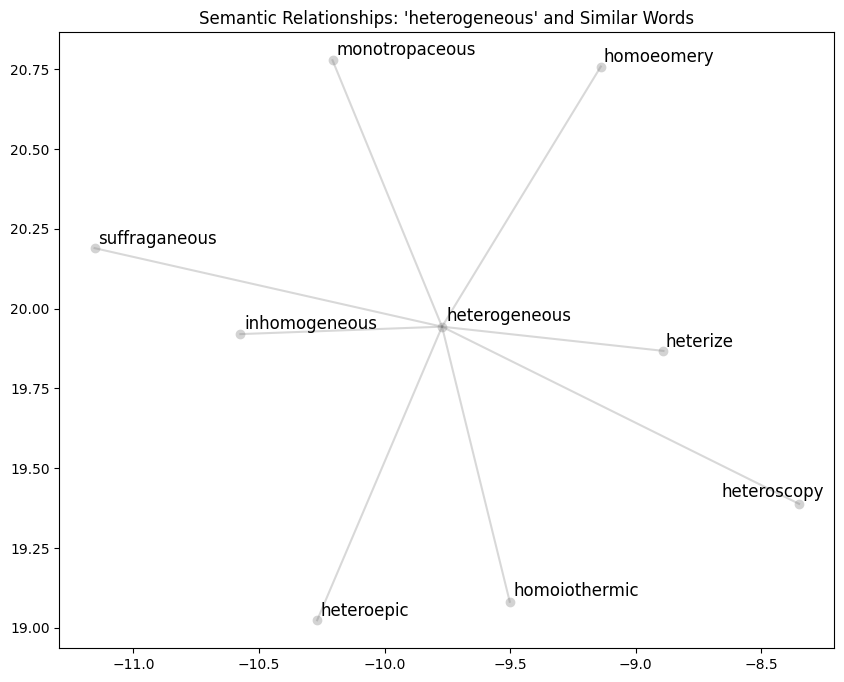

In [16]:
# Eg: View the semantic relationship of "heterogeneous"
plot_similar_words("heterogeneous", n=8)

* From this graph, we can see heterogeneous is at the center.

* Words like “inhomogeneous,” “heterize,” “heteroscopy,” “homoeomery,” are surrounding words. We can see the embedding model often captures not just pure semantics, but also morphological patterns (“hetero-” “homo-”). Many of these share prefixes and thus appear similar in the model’s embedding space.

* The lines show direct connections from “heterogeneous” to each neighbor, visually emphasizing that these are the closest matches in high-dimensional space.“inhomogeneous” is nearly a synonym for “heterogeneous,” so it makes sense it’s among the closest.

### Clustering Evaluation using KMeans & Silhouette Score

In [17]:
def evaluate_clustering(embeddings_2d, n_clusters=15):
    """
    Perform KMeans clustering on the reduced data and calculate the Silhouette score
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings_2d)
    score = silhouette_score(embeddings_2d, labels)
    return score

# Compute clustering quality for PCA, t-SNE, and UMAP reduced data
methods = {
    'PCA': PCA(n_components=2, random_state=42).fit_transform(embeddings),
    't-SNE': TSNE(n_components=2, random_state=42).fit_transform(embeddings),
    'UMAP': umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)
}

scores = {}
for name, emb in methods.items():
    scores[name] = evaluate_clustering(emb, n_clusters=15)

print("Clustering quality（Silhouette Score）：")
for name, score in scores.items():
    print(f"{name}: {score:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Clustering quality（Silhouette Score）：
PCA: 0.332
t-SNE: 0.330
UMAP: 0.374


* The overall silhouette score around 0.3 indicates the clusters are not very distinct. This may reflect that 15 clusters could be too many or too few, or that the embeddings themselves do not naturally form strongly separated groups in 2D.
* A higher Silhouette score indicates better separation between clusters. This is represented by points within the same cluster are more similar, and points in different clusters are more dissimilar. UMAP’s higher score shows that its 2D layout makes it easier for KMeans to form clearer clusters than PCA or t-SNE.

## Comparison betweem PCA, t-SNE, UMAP

* PCA is a linear method that projects data onto directions of maximum variance.
1. Strengths: Fast, preserves overall global structure, and is simple to compute.
2. Weaknesses: May compress complex, nonlinear relationships into one large blob; limited in presenting fine local structure.

* t-SNE is a nonlinear method focusing on preserving local neighborhoods.
1. Strengths: Excellent at uncovering local clusters and revealing fine grouping.
2. Weaknesses: Loses global structure; results can be sensitive to parameter choices and may vary between runs.

* UMAP ia a nonlinear manifold learning technique that balances local and global structure.
1. Strengths: Faster than t-SNE, scales well with large datasets, and produces a 2D layout that reflects both local and broader patterns.
2. Weaknesses: Results can still vary with parameter settings, and fine-tuning may be necessary.